<h1 style='text-align: center;'> Simulation Creation for Additive Manufacturing: </h1>
<h2 style='text-align: center;'> A Toolbox For Making Simulations </h2>
<h3 style='text-align: center;'> Ryan Mueller </h3>
<h3 style='text-align: center;'> 7/10/2023 </h3>
<hr>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Additive manufacturing is a quickly evolving and fascinating area of study where simulations are needed to make new discoveries. Simulations like the one being demonstrated in this tutorial help engineers understand how a manufacturing process really affects the material being used. In this tutorial, you will gain access to the tools necessary to create a simulation, including Jupyter Notebook, that can improve additive manufacturing practices. After experimenting with the example provided, I encourage you to try making a simulation you are interested in with the tools provided.
<hr>
<h2 style='text-align: left;'> Introduction to Additive Manufacturing </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Simulations are crucial for advancing the practices employed by today's engineers. Advancements produced by simulations can be seen in fields like manufacturing. This is due to simulations showing issues in a product before completion, preventing the creation of an unusable product. Additive manufacturing takes the idea of waste prevention even further by only using the material needed to create a part. If additive manufacturing and simulations are used together, an engineer can cut down on material and time waste. Making the process of part manufacturing more efficient. This report and walk-through gives details on a simulation that is used for additive manufacturing and provides information needed to create simulations.

<hr>

<h2 style='text-align: left;'> Information About The LAM Simulation </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The process being modeled in this simulation is called Laser Additive Manufacturing(LAM). LAM uses a bed of metal powder and a fine high-power laser to create complex parts without the need for extra support material. Complex tools and personalized medical equipment can be made using LAM due to its extreme precision and accuracy. To ensure that a LAM printed part will be created correctly, simulations are used to predict the print layers of the part. Any anomalies in the weld puddle, the area directly melted by the laser, can be seen and recorded by the engineer using the simulation. The LAM simulation created for this walk-through went through many changes and development steps before being labeled finished. Methods of heat generation, data collection, and animation visualization were changed repeatedly to ensure the best simulation possible. The final version of the LAM simulation meets all desired design specifications. Features of the simulation will be covered, but further details on how specific code is written can be seen in the annotations of the Laser_Demo notebook. The annotations are line-by-line and could be useful for understanding how to create further simulations.

<h3 style='text-align: left;'> Design Specifications</h3>

* Must accept user generated inputs.
    
    * Input options provided to users must be explicitly defined, easy to find, and simple.
    
    <br>    
* The simulation must feature a moving Gaussian distributed heat source on a sample plate.
    
    * The simulation must show the temperature distribution of the sample plate.
    
    * The simulation must show the weld puddle created by the heat source. 
        
    * The simulation must be able to provide images immediately after each calculation is completed.
    
    <br>
* The calculations within the simulation must accurately and quickly produce the required data.
    
    * The calculations within and the animation out must be fully controlled by user input.
    
    * The calculations must be supported by known heat transfer theory.
    
    * The code used for calculations must be accelerated.
    
<h3 style='text-align: left;'> Heat Transfer Theories Used</h3> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To predict what happens during surface heating, engineers and physicists needed a way to calculate the heat transfer through the surface. Theoretical solutions were the best option when setting the foundation and Daniel Rosenthal produced many theoretical solutions for moving sources of heat across a plane. All of Rosenthal’s solutions had the following assumptions in common, material properties were constant, convection and radiation were ignored, and the heat source is a moving point. The following is the theoretical solution for a point heat source moving across a semi-infinite plane as provided by Rosenthal. 

<p style="text-align: center;">
$T_n(x,y)=T_0(x,y) + \frac{q(\rho{c_p})^{\frac{1}{2}}}{8(\pi{k}{dt})^{\frac{3}{2}}}\cdot{e^{-\frac{\rho{c_p}}{4kdt}[(x-x')^{2}+(y-y')^{2}]}}$</p>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With these assumptions, Rosenthal was able to create exact solutions for many types of surfaces and estimate a weld pool, but a problem remained. A heat source cannot be properly represented by a point. To better replicate practical situations, Gaussian distributed heat sources were used in place of a single point. A Gaussian distribution-based heat source is an infinite amount of point heat sources distributed within a radius equal to the distribution parameter. The energy provided by each point decreases as the distance from the center of the Gaussian source increases. Dr. Thomas Eagar used the solution created by Rosenthal to make a solution for a moving Gaussian-distributed heat source across a plane. Using the same assumptions as Rosenthal, Dr. Eagar produced the following solution.

<p style="text-align: center;">$T_n(x,y) = T_0(x,y) + \frac{q\cdot{dt}}{\rho{c_p}\pi\cdot(4\pi\alpha\cdot{dt})^{\frac{1}{2}}}\cdot\frac{1}{4\alpha\cdot{dt}+2\sigma^{2}}\cdot{e^{(-\frac{(x-x')^2+(y-y')^2}{2\sigma^2+4\alpha\cdot{dt}})}}$</p>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The solutions created by both Rosenthal and Dr. Eagar are not exact solutions and depend on the step size used for the integration. If the step size is extremely small, then the error can be negligible. To ensure the LAM simulation’s accuracy the step size must be kept as small as possible.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To describe the diffusion of heat through materials, the general conduction equation was derived. Conservation of energy is the theory that drives the general conduction equation and states that energy cannot be created nor destroyed. Meaning the heat energy from the laser must be transferred to the material bed. Physical properties such as density and conductivity change with temperature but can be difficult to simulate when not knowing the material being used. To make the conduction equation and simulation more general, the physical properties of the material will be held constant. The general conduction equation for a plane in standard coordinates can be seen below.

<p style="text-align: center;">$\frac{\partial T}{\partial t} = \alpha\cdot[\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}]$</p>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Solving the general conduction equation for a temperature at a specific node at a specific time can be done by using finite difference equations. Finite difference equations allow for the ability to calculate derivatives through finite means, which is good for computers. The implicit method of solving finite difference equations allows for larger times steps to be used while maintaining stability. Needing fewer time steps means that the amount of data collected is less for the same amount of time, increasing code performance while keeping accuracy the same. The finite difference equations for the conduction equation can be seen below, along with the implicit solution to the finite difference equation.

<p style="text-align: center;">$ \frac{T_{i,j}^{t}-T_{i,j}^{t-1}}{dt} = \alpha\cdot[\frac{T_{i-1,j}^{t}+T_{i+1,j}^{t}-2T_{i,j}^{t}}{dx^2}+\frac{T_{i,j-1}^{t}+T_{i,j+1}^{t}-2T_{i,j}^{t}}{dy^2}]$</p>

<p style="text-align: center;">$T_{i,j}^{t} = [\frac{1}{1+2\alpha{dt(\frac{1}{dx^2}+\frac{1}{dy^2})}}]\cdot[T_{i,j}^{t-1} + (\alpha{dt})(\frac{T_{i-1,j}^{t}+T_{i+1,j}^{t}}{dx^2}+\frac{T_{i,j-1}^{t}+T_{i,j+1}^{t}}{dy^2})]$</p>

<h6 style='text-align: center;'> Variable List</h6> 

| Variable | Name | Units|---------------| Variable | Name | Units|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$(x,y)$|Measurement Location|$m$|---------------|$(x',y')$|Heat Source Location|$m$|
|$T_n$| Current Temperature<br>at $(x,y)$| $K$ |---------------|$T_0$| Previous Temperature<br>at$(x,y)$| $K$
|$(i,j)$|Active Node|$none$|---------------|($i+-1$,$j+-1$)|Adjacent Node|$none$|
|$T^t$| Current Temperature<br>for Node| $K$ |---------------|$T^{t-1}$| Previous Temperature<br>for Node| $K$
|$q$| Heat Rate | $W$ |---------------|$dt$| Change In<br>Time | $sec$
|$\rho$| Density of Material| $\frac{kg}{m^3}$ |---------------|$c_p$| Specific Heat<br>of Material | $\frac{J}{kg\cdot{K}}$
|$k$|Conduction Coefficient<br>of Material| $\frac{W}{m\cdot{K}}$|---------------|$\alpha$|Thermal Diffusivity<br>of Material|$\frac{m^2}{s}$
|$\sigma$|Distribution Parameter|$m$|---------------|$dx$ or $dy$|Distance Between<br>Nodes|$m$|

<h3 style='text-align: left;'> Practices Used And Application Of Theory</h3> 

<h6 style='text-align: left;'> Inputs</h6> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The process of defining input values had to be easy for the user while providing all information needed to change the LAM simulation. To achieve this, all user-based variables were placed in the same cell and are explicitly labeled. The units for each unit-based variable are listed and a conversion coefficient is included with initialization. Material properties are measured in smaller units that must be converted for calculations, so the conversion if needed, happens at the input level. The Type of conversion is listed next to the variable and can be removed if the user wants to use base units. All material, laser, path, and animation properties can be controlled and changed by the user.  The number of inputs for the LAM simulation became larger than expected, so some input options were simplified to String data types. This was done to simplify the number of options a user may have so that the time taken to learn the LAM simulation is lower. An example of this can be seen in the decision to make the Letter path type. To avoid making a new path based on points every trial, a user could just change the letter they enter. This would increase the user’s ability to test new settings for different path types. With all inputs changed at the beginning of the code, the user will not need to interact further with the code. 

<h6 style='text-align: left;'> Calculations</h6> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Using the material, laser, and path properties defined by the user, the temperature distribution on the sample surface must be calculated. The first step for completing the calculations is to determine where the laser will be for each data set. This is done by taking the path defined by the user and turning it into a series of points that are linearly spaced by the time step dt. The points generated by this process are then used at each dt to produce the location of the laser at time t+dt. To calculate how the temperature changes through the material, a mesh of data collection nodes is required. Using the plate lengths and numbers of nodes, a linearly spaced mesh is created on the surface. Now that the laser position is known and a mesh has been created, the temperature increase from the laser can be calculated. Using the solution found by Dr. Eager, the temperature at each point in the surface mesh can be calculated. A set of nested for loops change the mesh node and previous node temperature while keeping the laser position constant. This creates a two-dimensional array of temperatures that represent the temperature distribution on the surface of the material bed. Before calculating the temperature distribution for the next time step, the heat diffusion through the material must be calculated. This is done by using the solution to the general heat conduction equation and the explicit finite difference method. The temperature distribution after diffusion is set as the previous temperature array and the next time step is completed with the new laser position.

<h6 style='text-align: left;'> Code Acceleration</h6>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To achieve the quick runtime specification, a code accelerator was utilized to increase the calculation speed. Numba is a module added to Python that can accelerate code through the use of function decorators. The function decorators allow access to Just-In-Time compilation features that transition the Python language used to native machine language. The use of Numba in this simulation made it possible to calculate large data sets with little gain in time. Numba was chosen as the code accelerator for this simulation because it works well with Numpy functions and arrays. Numpy made handling the temperature and mesh arrays easier and more efficient. To recreate a simulation like this, Numba and Numpy are essential modules.

<h6 style='text-align: left;'> Simulation Animation</h6>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The calculations from the code were able to be visualized through the use of the Python module called Matplotlib. Matplotlib reproduces the plotting environment seen in Tools like Matlab and makes graphing data simple. Each frame of the animation shows the temperature distribution through the bed surface and the area currently over the melting point. This area is termed the weld puddle because it is the active area where melting is occurring. The animation is created by updating a figure each time a new set of data is calculated. By clearing and updating the same figure each time, the amount of memory being used during the simulation is decreased. The only drawback with this process is that the previous frames of the animation are not saved by default. To save the entire animation, another option is provided to download the animation as a GIF or HTML file. The frames are saved after the calculations are finished and the initial animation is shown.

<h3 style='text-align: left;'> Simluation Flow Chart</h3> 

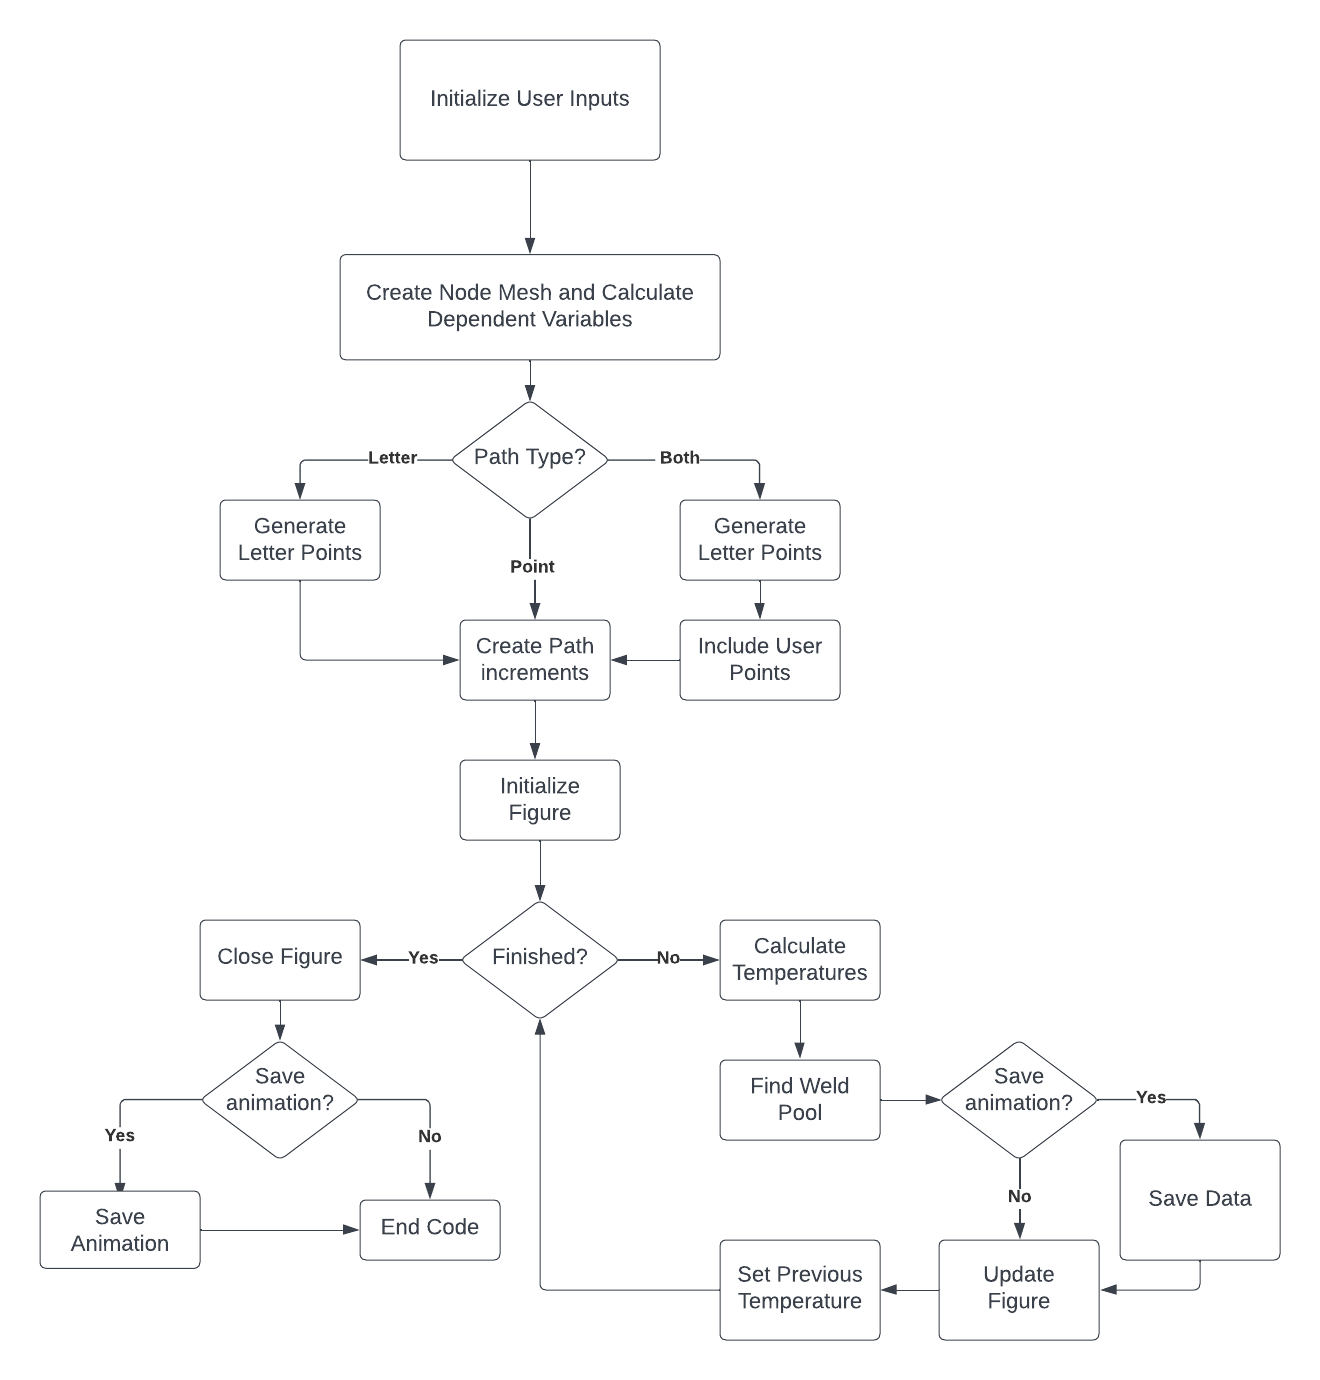

<hr>
<h2 style='text-align: left;'> Simulation Creation Tools and Terms </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There are many tools to choose from when creating simulations and new packages are always being developed. This can lead to an overload of options and confusion, especially for newcomers. To help jump-start the simulation creation process some of the basic tools and terms used with them will be provided. This is not an exhaustive list, but everything needed for this walk-through can be found here.

| Tools (Order of Appearance) | Tool Type |Purpose| Useful Terms|
|:-:|:-:|:-:|:-:|
|**Linux**|Operating System (OS)|Controls a computer's functions and connects hardware to software|**Present Working Directory**: The directory where work(install, or commands) is being completed.<br><br>**Command Line**: The interface for user inputs.<br><br>**Command**: A user input that tells the OS what needs to be done.<br><br>**Sudo**: Add this before a command to make a system level change. Requires a password set by user.<br><br>**Package**: An add-on to Linux that provides extra features. Packages are added by *apt*<br><br>|
|**Ubuntu**|Linux Based OS|A version of Linux that is easy to use|**GUI**: A graphic representation of a software. Not required for command running.
|**apt**|Linux Package Manager|Manages install and upgrades of packages used by a Linux based OS|-------------------|
|**Python**|Coding Language|Allows for high level code writing and clear and simple work space|**Kernel**: Connects applications to computer hardware and can store execution results.<br><br>**Runtime**: The stage when a code is being run with external resources (CPU...) being accessed.
|**pip**|Python Package Manager|Manages install and upgrades of packages used by python|-------------------|
|**IPython**|Python Shell|Provides debugging information and is the kernel of Jupyter Notebook|-------------------|
|**Git**|Version Controller|Allows collaborative code sharing and can save a code's version history|**GitHub**: The server that stores codes saved by git and hosts repositories for shared code.<br><br>**Repository**: A collection of codes of any type that can be accessed at once. Repositories can be cloned<br>or downloaded from GitHub.<br><br>**Git Clone**: A repository from GitHub that has been installed on another system.
|**Jupyter**|Web-Based<br>Development Environment|Provides a medium for working with multiple coding languages and types|-------------------|
|**Jupyter Notebook**|Jupyter Environment|Allows code to be written with text and provides graphics for code|**Cell**: The area where code and text writing is completed. With two main types of cells: <br>*Markdown*: For text writing.<br>*Code*: For Code writing.<br><br>**Extension**: An add-on for Jupyter Notebook that can provide extra features for Jupyter Notebook.
|**Nbextensions**|Jupyter Extension|Provides many quality-of-life additions not included in Jupyter Notebook|**Code Folding**: Allows a user to collapse code not currently being worked on. This can clean the<br>notebook and make a long code easier to work on.
|**Google Colab**|Web-Based<br>Development Environment|Provides a medium for working with<br>Only Python|**Google Drive**: A cloud-based file storage system. Notebooks created will be saved here.|


<hr>
<h2 style='text-align: left;'> Accessing the LAM Simulation </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Two options are being provided in this walkthrough: Jupyter Notebook and Google Colab. It is recommended that the **Why Choose Me?** sections are read before deciding which path to go down. The options are independent of each other, so only one is needed. Choose which one works best for you or try both.

<h3 style='text-align: left;'> Jupyter Notebook </h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Why choose Jupyter Notebook?:** Jupyter Notebook is a versatile tool that can be used to create files with text and code. Extensions can be added to jupyter notebook to fit a user’s needs more personally. Because of Jupyter Notebook's use of Python and Linux, version control and file sharing through GitHub is less complex. **Jupyter Notebook requires downloading software directly to your computer or flash drive, including a Linux-based terminal and Python tools.** If you intend on using, creating, and sharing files with text and code regularly and have at least 5 GB of memory available, Jupyter Notebook may be the best option.

1. Ubuntu has provided a detailed walk-through on downloading the Ubuntu app on all computers. If you use Windows, you can install Ubuntu quite easily by following this link: [Link](https://ubuntu.com/tutorials/install-ubuntu-on-wsl2-on-windows-11-with-gui-support#1-overview) This link is not the only resource available, if further information is required a google search for installing Ubuntu will provide help. **The GUI for Ubuntu is not needed.** If you use Mac OS, then you don’t need to install Ubuntu. You work under terminals. (This tutorial is primarily Windows-based.) Proceed when access to sudo or root is gained and the screen looks like this:

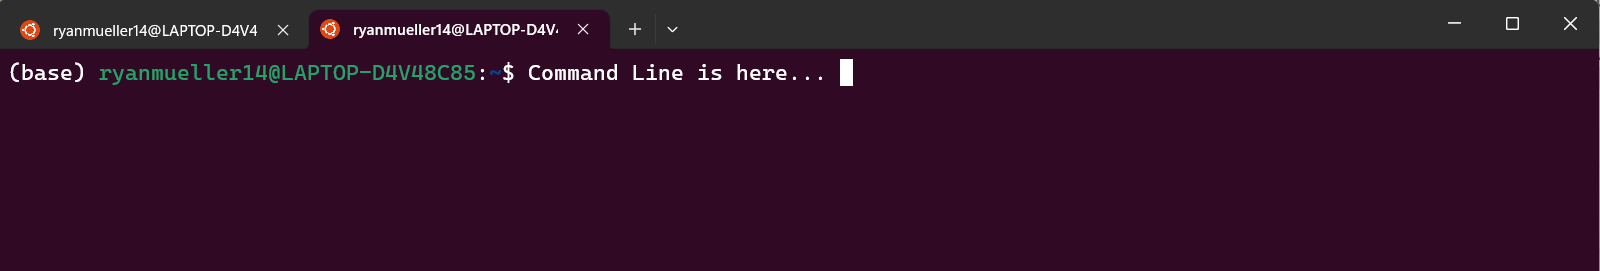

2. Almost all the operations are done through command lines. **Usually Linux doesn't have a GUI interface.** If you are not familiar with Linux you should familiarize yourself with Linux commands [Link](https://files.fosswire.com/2007/08/fwunixref.pdf). The Link has all the basic commands, which may help files later and ease the Jupyter Notebook learning process. 

3. Jupyter Notebook is a dependent module, so some packages are required before installation can begin. Packages allow actions in Linux that would not be possible with the base version. Such as installing programs, accessing new software, and parallel computing. To install a package, a command is run within the command window. A package is finished installing when your user input reappears after initiating the installation. Packages needed for Jupyter Notebook include the following: 

In [ ]:
sudo apt update                                      # apt gets the packages needed
sudo apt upgrade                                     # Ensures apt is the right version
sudo apt install python3 python3-pip ipython3        # three python packages at once
sudo apt-get install git-all                         # Installs git to access GitHub Later

4. Now that all packages needed for Jupyter Notebook are installed and ready to use, Jupyter Notebook is available to install. Once Jupyter is installed, Jupyter Notebook can be called using the new Jupyter sub-command. See below:

In [ ]:
sudo pip3 install jupyter                            # Installs jupyter
jupyter notebook                                     # Calls jupyter notebook from sub-command jupyter ** also for part 7

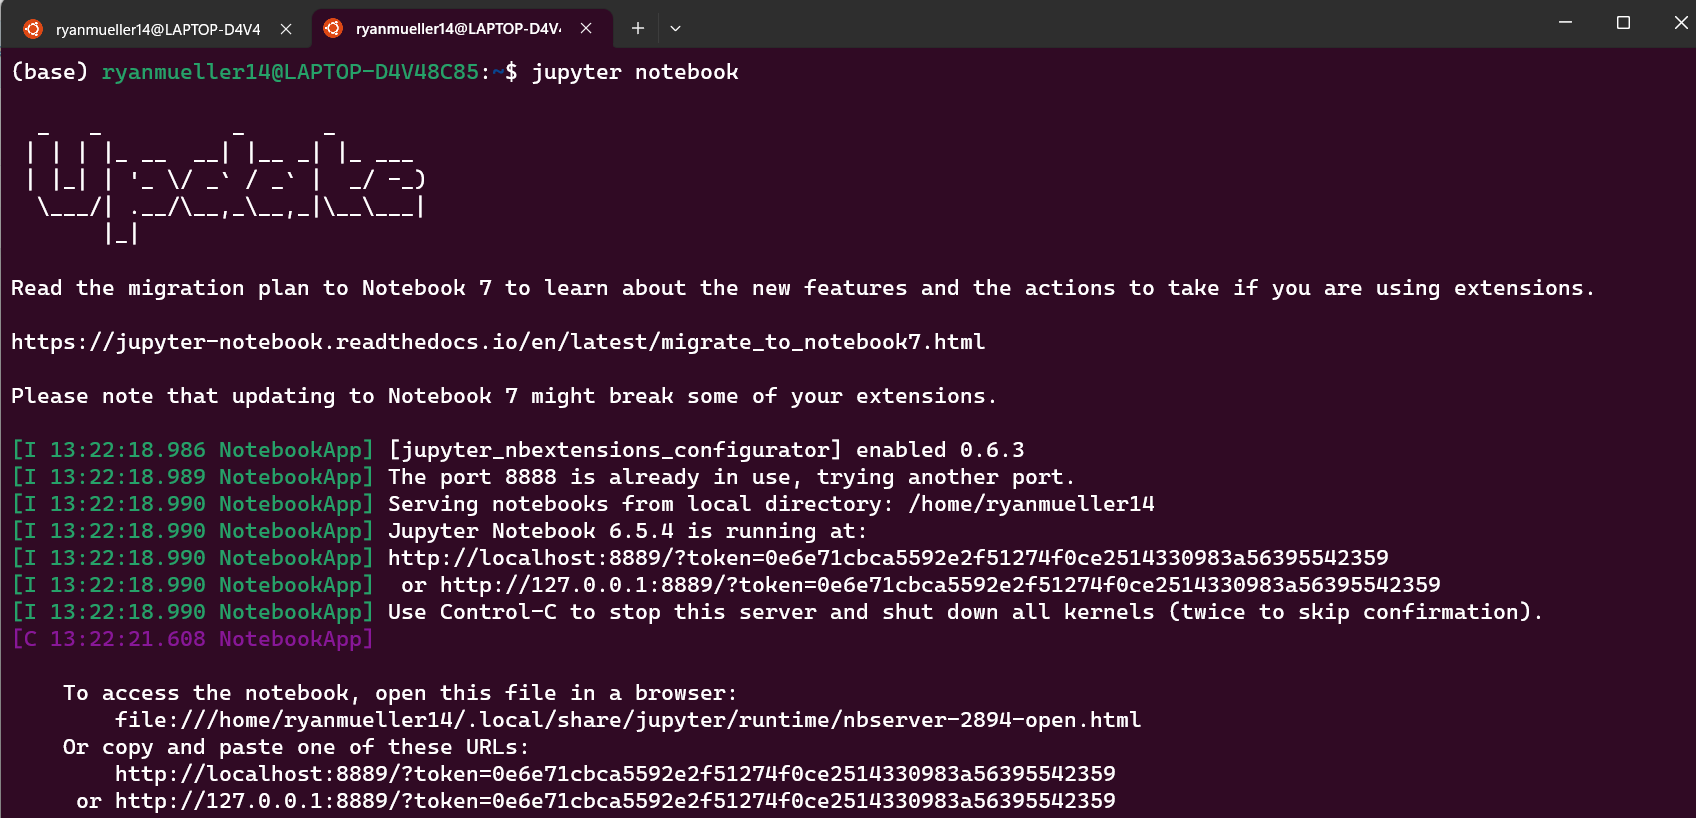

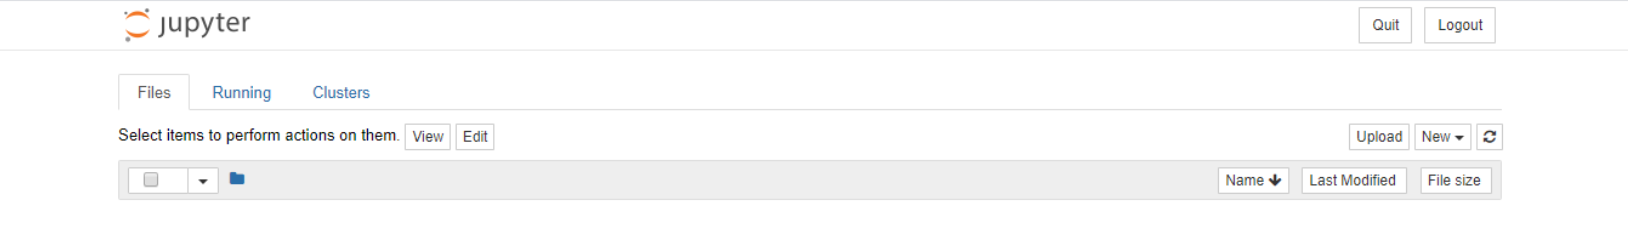

5. Extensions can be added to Jupyter Notebook to improve the working experience and make using Jupyter Notebook easier to use. Adding extensions is not required, but **if you want to hide input code or have more visualization options**, nbextensions is a useful extension to have. For this demonstration, it is recommended that **code folding** is enabled in the nbextensions tab. To install and configure nbextensions, close Jupyter Notebook and complete the following:

In [ ]:
 sudo pip3 install jupyter_contrib_nbextensions      # Installs the needed packages for nbextensions to the system
 sudo jupyter contrib nbextension install --user     # Tells jupyter to install nbextrnsions from the system   

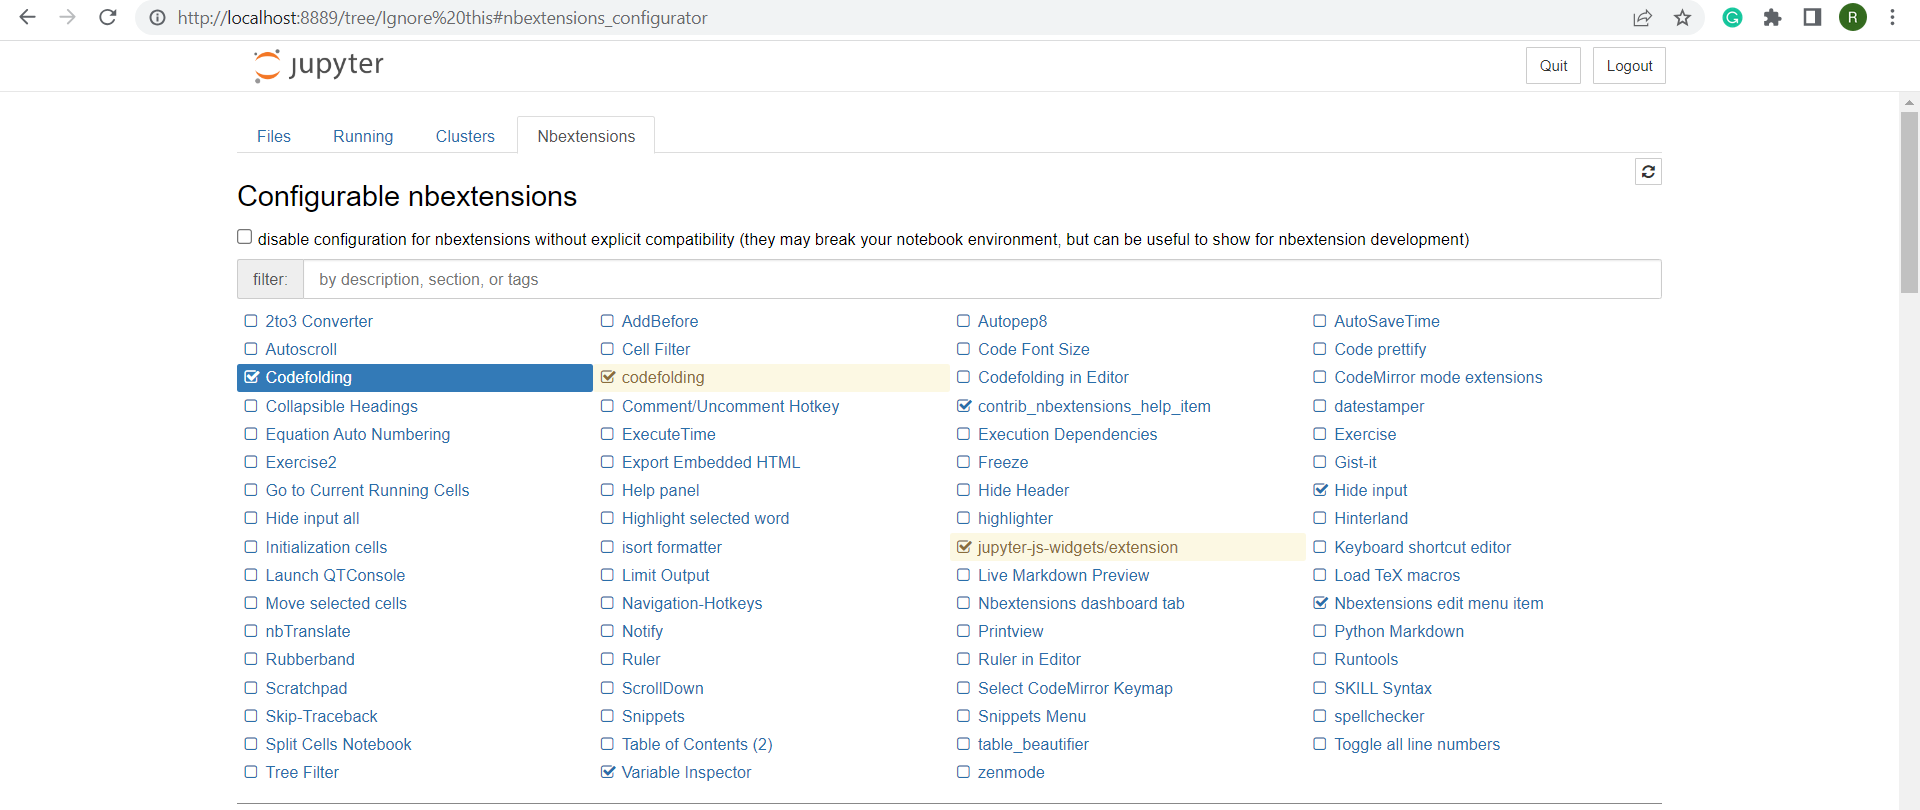

6. Now that Jupyter Notebook is installed and accessible, it is time to download a clone of the git repository needed for the laser demonstration. To create a clone of the repository, use the command below. It will create a new directory in the present working directory.

In [ ]:
git clone https://github.com/RyanMuellerNIU/AM\_Laser\_Simulation.git    # Creates a git clone of the repository

7. Use the Jupyter Notebook sub-command mentioned in part 4 to open jupyter notebook. If Jupyter Notebook has been open while completing parts 5 and 6, close and reopen it to restart the Jupyter server. Once this is done, a folder named "AM\_Laser\_simulation" should appear in the files folder. Open it and select "Package\_Install.ipynb". This will ensure that the latest versions of packages needed for the laser demonstration are installed.  "Package\_Install.ipynb" only needs to be run the first time you open the "AM\_Laser\_simulation" folder. 

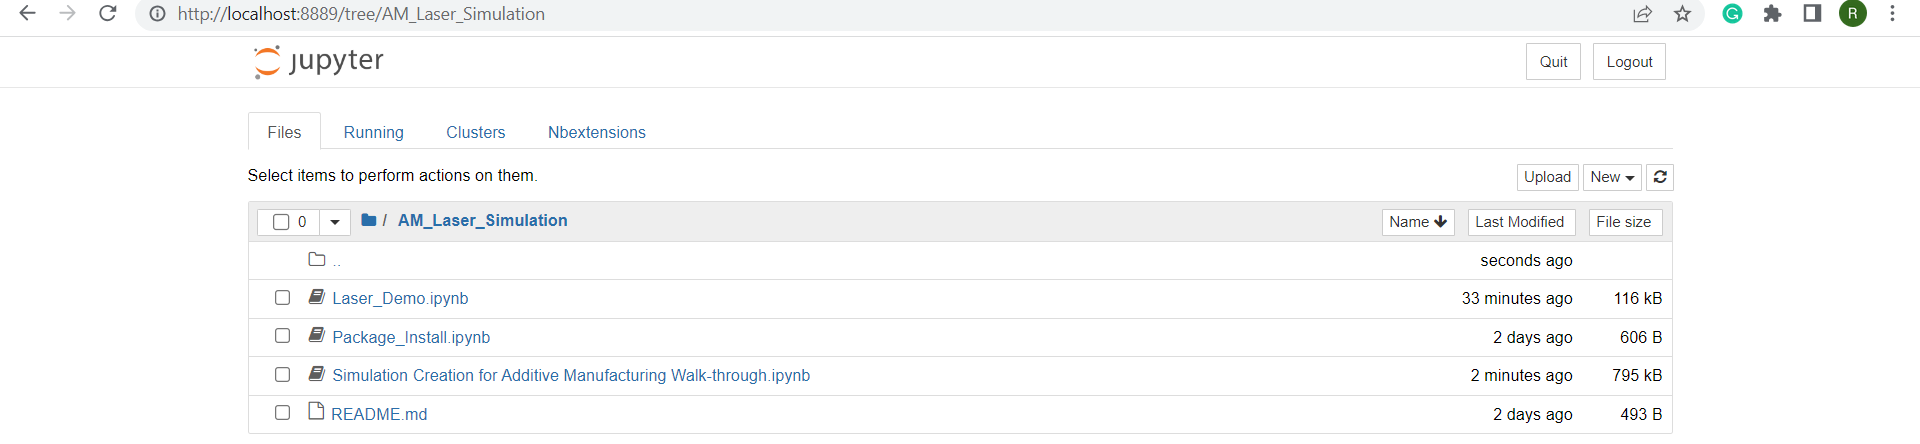

8. All packages needed for the LAM simulation are installed, so select "Laser\_Demo.ipynb" from the files tab. **For the first run**, click run on the tool bar. 
**Quick Tip:**  Restart the kernel between program runs to improve performance.

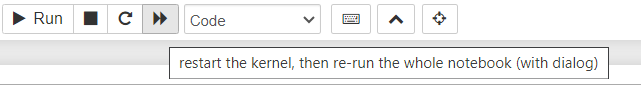

9. All information for settings and exploring the Laser Simulation can be found in the Exploring The Additive Manufacturing Laser Simulation section.

<h3 style='text-align: left;'> Google Colab </h3>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Why choose Google Colab?:** Like Jupyter Notebook, Google Colab can be used to create files with text and code. Files made in Google Colab can be edited live by multiple users, making real-time collaboration easier. Jupyter Notebook files can be opened and saved using Google Colab. **Google Colab does not require downloading any software directly to your computer, only to google drive.** If you need to access files on a computer with strict memory capacity, Google Colab may be the best option. **Warning:** Due to Google servers having large traffic, the performance of code may be impacted, leading to longer run times.

1. **Skip if already using a Google account.** To start using Google Colab, a new Google account is needed. This can be done by searching "Create New Account" in Google and following all steps Google provides.

2. Google Colab can be accessed by searching "Google Colab" within a Google search window. Select the "Welcome to Colaboratory" page and if already signed into a Google account, you will be directed to Google Colab. Any Files created in Google Colab will be saved to a default google drive folder called  "Colab Notebooks"

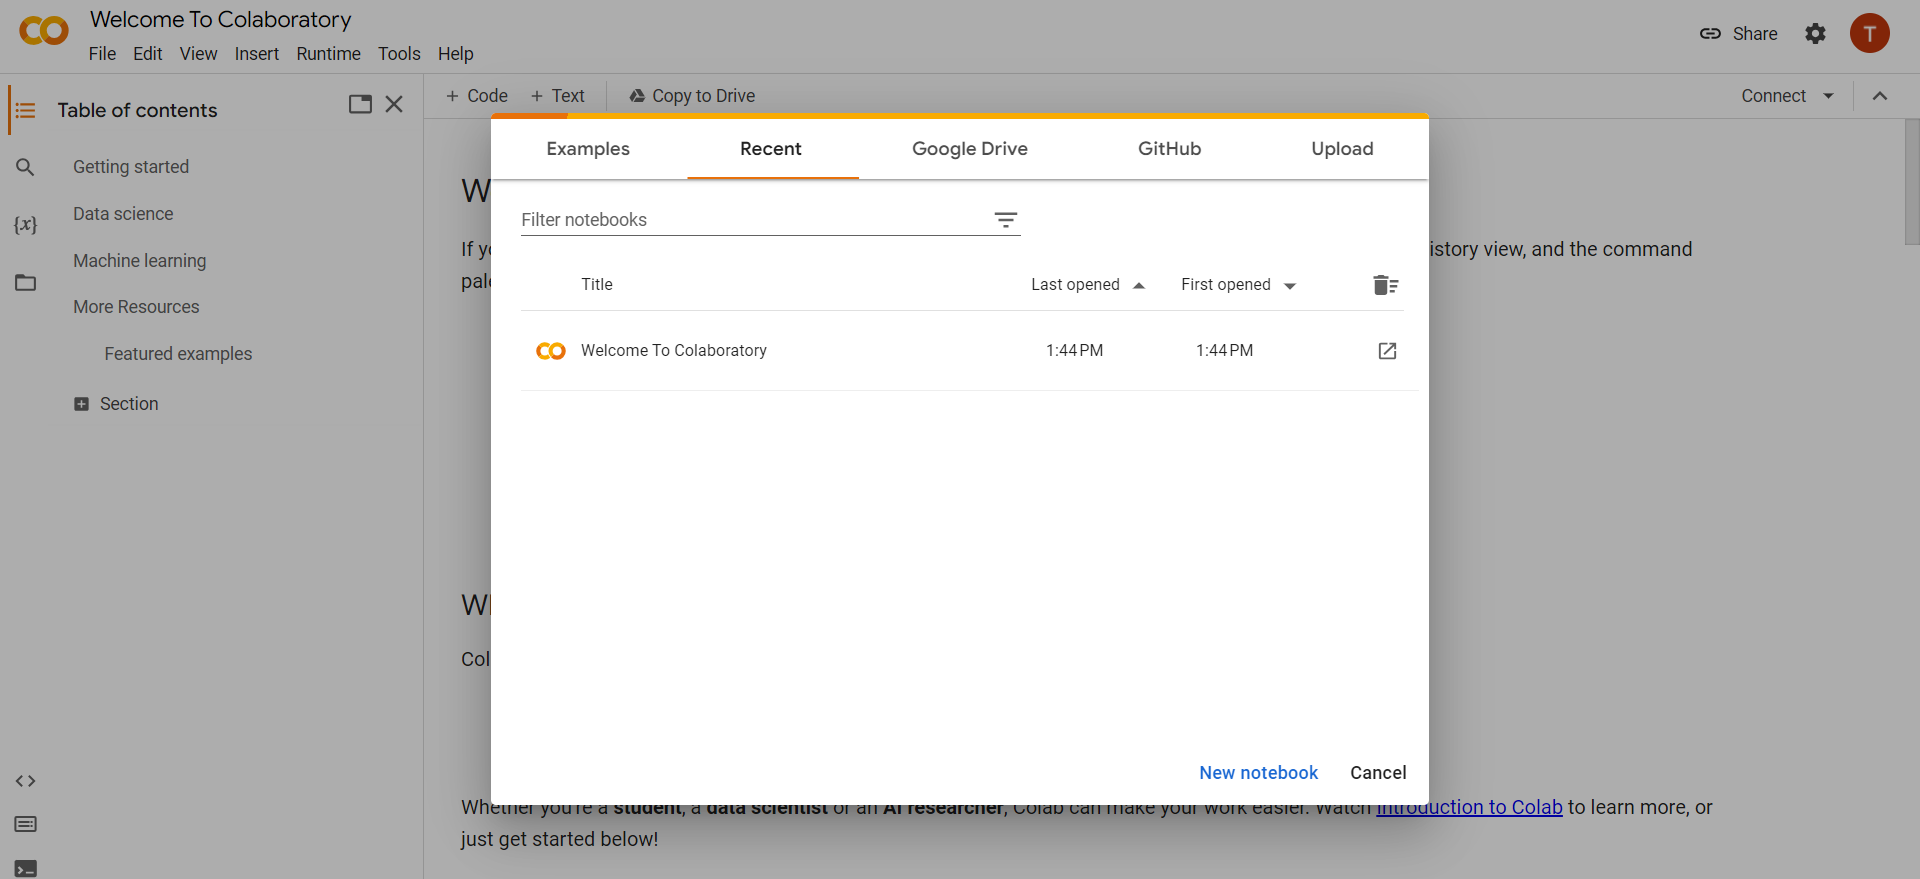

3. To access the laser demonstration from GitHub take the following steps. Within the notebook selection window go to the GitHub tab and enter the following GitHub URL. If the Notebook selection window did not open automatically it can be opened by clicking the file drop-down and selecting open notebook.
    * https://github.com/RyanMuellerNIU/AM_Laser_Simulation.git
    * If unable to copy and paste: enter user as RyanMuellerNIU and select AM\_Laser\_Simulation
    
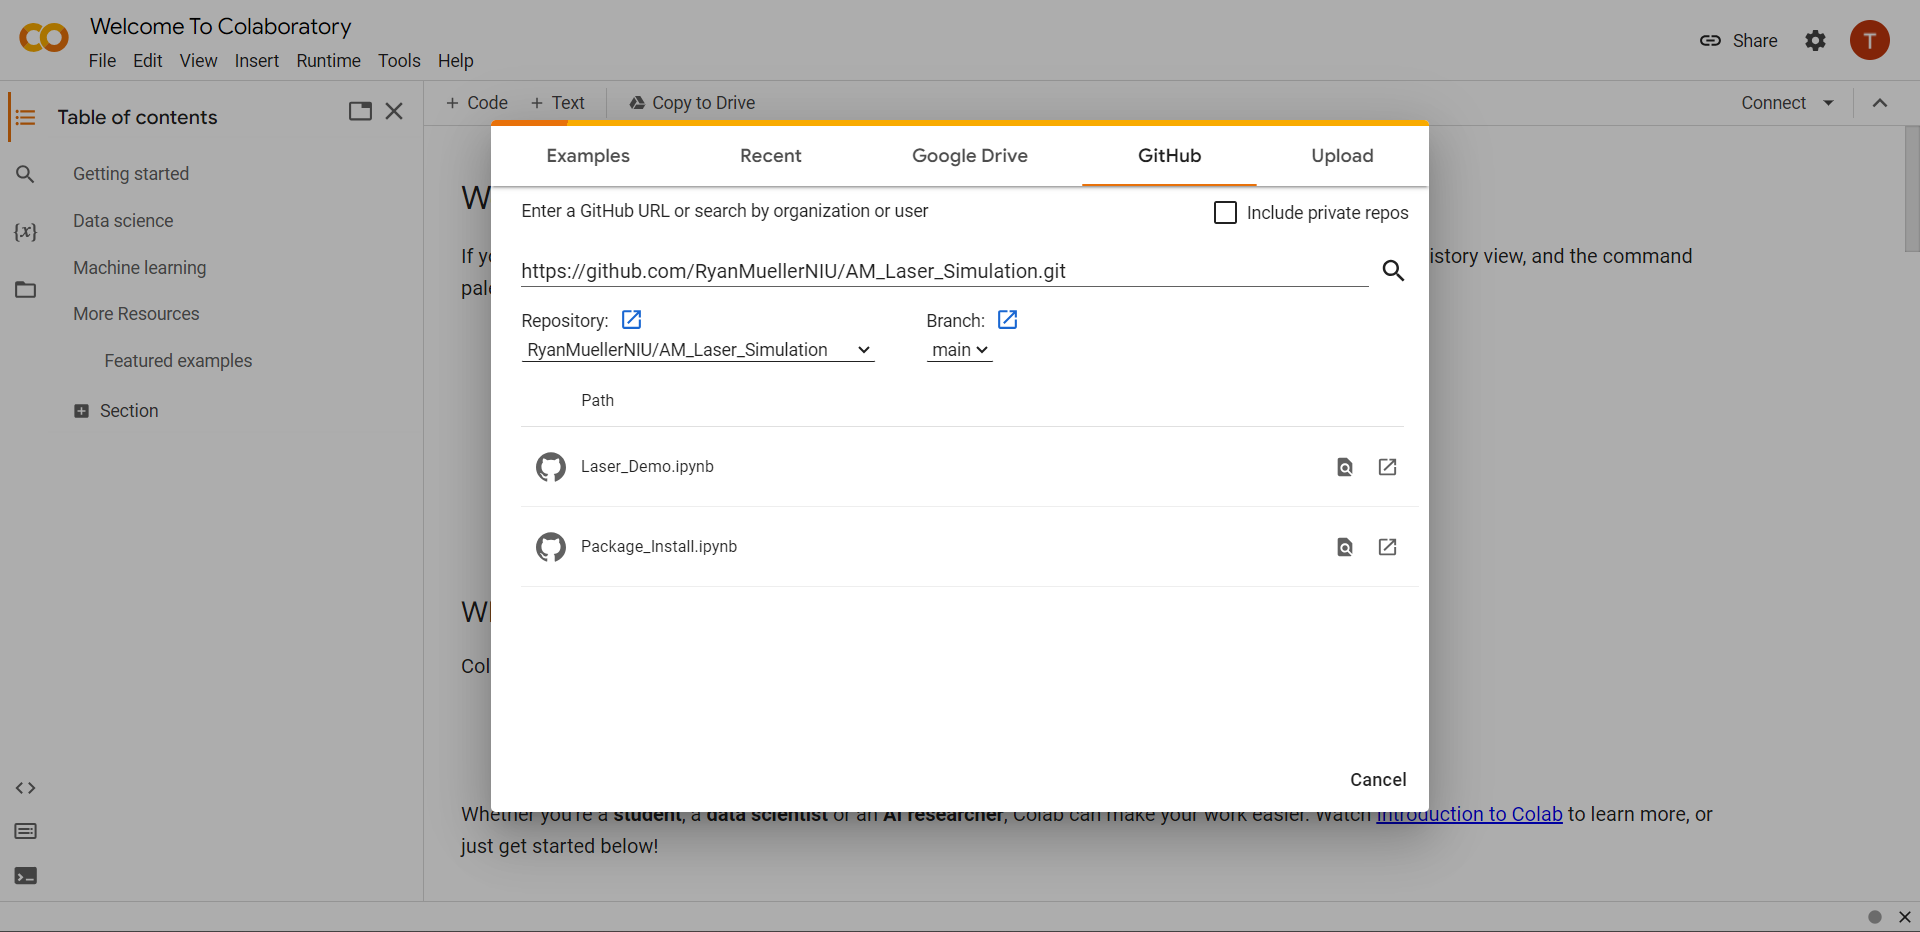


4. Select the "Package\_Install.ipynb" notebook and run the commands to install the packages needed to run the "Laser\_Demo.ipynb" notebook. To run the commands, click Runtime and select Run all. No download or copy of the Install Packages notebook is needed for further use of the Laser demonstration.

5. Return to the GitHub window by clicking the file drop-down and selecting open notebook. Select "Laser\_Demo.ipynb" and now that all packages are installed, the laser demonstration can be used and explored. **For the first run,** go to Runtime and select Run all.<br> 
**Quick Tip:**  Restart the kernel between program runs to improve performance.

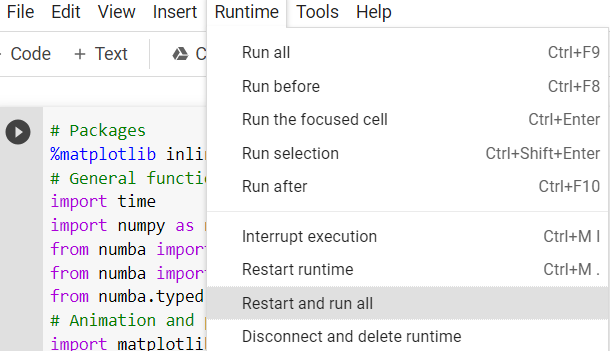


6. All information for settings and exploring the Laser Simulation can be found in the Exploring The Additive Manufacturing Laser Simulation section.

<hr>
<h2 style='text-align: left;'> Exploring The LAM Simulation </h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Simulations are great tools for learning about what works and what doesn't about a given process. To explore this simulation, ask yourself the following questions and experiment with different settings to find the best settings for your design.

<h5 style='text-align: left;'> Helpful Questions </h5>

* What plate and grid sizes work best for the design?
* How should the initial temperature change to improve the design?
* What material properties would produce the best result?
* Are the Temperatures produced by the laser path at a safe level?
* How should the laser power be adjusted for the design?
* How will a new laser speed affect the design?
* Could a change in laser radius be beneficial to the design?
* Which path type would be best fit for the design?
* If using the Letter type, Do the letters have enough space?
* If using the Point type, Is the path efficient and clean?
    * Are there unneeded paths being made?
* Do you want to see the path being traced, or just the final design?
* How much data do you want to collect, or show?
* Are there enough temperatures being shown in the animation?
* If saving the animation, how many frames are necessary? (Lower the better)


<h5 style='text-align: left;'> Settings and Input List </h5>

|      Input Name      | Data Type | Units |             Purpose            |
|:-:|:-:|:-:|:-:|
|**Plate Initialization**|---------|-------|--------------------------------------|
|x_length and y_length |   Float   |  $m$  |   Sample plate side lengths    |
|nx and ny             | Integer   | $none$  |  Number of data collecting  nodes<br>in the x and y direction.|
|**Plate Properties**|---------|-------|--------------------------------------|
|T0 | Float | $K$ | The initial temperature of the sample plate
|k | Float | $\frac{W}{m\cdot{K}}$ | Sets the conduction coefficient of the sample material
|cp | Float | $\frac{J}{kg\cdot{K}}$ | Sets the specific heat of the sample material
|rho | Float | $\frac{kg}{m^3}$ | Sets the density of the sample material
|Melt\_Temp | Float | $K$ | Sets the melting point of the sample material
|Est\_Max\_Temp | Int | $K$ | Sets the maximum temperature seen on the contour plot.<br>This should never be over 3,500 K.<br>At over 3,500 K, the laser should be deemed unsafe for use.
|**Laser Initialization**|---------|-------|--------------------------------------|
|q | Float | $W$ | Controls the power given to the laser. 
|Speed | Float | $\frac{m}{sec}$ | Controls the speed of the laser,<br>independent of movement direction
|L\_Rad | Float | $m$ | Controls the radius of the laser beam.
|down\_time | Float | $sec$ | Controls the time simulated after laser completion.<br>A high down\_time leads to more cooling.
|Path\_Type | String | $none$ | Determines how a path will be created by the laser.<br>Sets the path as 'Point', 'Letter', or 'Both'.
|**Letter Path Type**|---------|-------|--------------------------------------|
|Letters | List of Strings | $none$ | Creates a list of letters that controls the laser path.<br>Any letter can be entered and a new line can be created.<br>ex: list(['H','E','L','L','O','newLine'])
|X and Y Offset | String | $none$ | Sets where the first letter starts, letters move right.<br>X: 'Left','Center','Right'. Y: 'Top','Center', 'Bottom'
|Letter Height and Width | Float | $m$ | Sets the font size for the letters in the list.
|Letter\_Space | Float | $m$ | Sets the amount of space between the centers of the letters.<br>(Not the ends)
|**Point Path Type**|---------|-------|--------------------------------------|
|HS\_Path | List of<br>Float Arrays| [$m,m$] | Creates a list of points that controls the laser path.<br>The laser moves point-to-point and disconnects points if<br>'stop' is entered between them. 
|path\_stops | Int | $none$ | Saves the number of stops entered in HS\_Path.<br>This ensures all points are accounted for.
|**Simulation Options**|---------|-------|--------------------------------------|
|Sim\_Type | String | $none$ | Sets the type of simulation.<br>'Steps' shows the frames between start and finish.<br>'Final' only shows the final frame of the simulation.
|Sample\_rate | Int | $\frac{sets}{sec}$ | Sets how many data sets are collected in one second.<br>Using more Data sets leads to higher accuracy but longer runtimes
|Frame\_rate | Int | $\frac{sets}{sec}$ | Sets how many data sets will be displayed per second.<br>Setting a lower frame rate may allow for faster runtimes<br>without loss of simulation accuracy.
|**Save Animation Options**|---------|-------|--------------------------------------|
|Save\_Animation | String | $none$ | Determines if a file of the simulation will be created after running.<br>'Yes' or 'No'
|file\_name | String | $none$ | Provides a name for the save file.<br>Example: 'Laser\_Path.html' 
|file\_type | String | $none$ | Provides the type of file being saved.<br>Can only be 'HTML' or 'gif'
<hr>